In [1]:
#Author: Peiqi Chen, Hao Feng

#Import packages
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#Read data
df = pd.read_csv("Final Project_Group27.csv")
df['DATE'] = pd.to_datetime(df['DATE'])
df

,DATE,PTR,Rf,Mkt-Rf,SMB,HML,OilPriceChg,USDAPPR,PTR-Rf,NTES-Rf
0,2000-11-01,-19.17,0.51,-10.72,-3.39,12.34,3.99,0.00,-19.68,9.79
1,2000-12-01,-3.28,0.50,1.19,0.73,7.60,-17.27,0.00,-3.78,-13.00
2,2001-01-01,5.36,0.54,3.13,6.68,-5.11,3.94,0.01,4.82,-27.07
3,2001-02-01,6.70,0.38,-10.05,-0.74,12.48,0.10,0.00,6.32,-14.27
4,2001-03-01,-3.33,0.42,-7.26,0.27,6.43,-8.00,0.00,-3.75,-39.13
...,...,...,...,...,...,...,...,...,...,...
237,2020-08-01,0.17,0.01,7.63,-0.26,-2.92,4.00,-0.10,0.16,6.59
238,2020-09-01,-11.03,0.01,-3.63,0.02,-2.62,-6.40,-0.33,-11.04,-6.69
239,2020-10-01,-3.33,0.01,-2.10,4.41,4.16,-0.58,-1.27,-3.34,-4.57
240,2020-11-01,11.91,0.01,12.47,5.65,2.13,3.91,-0.04,11.90,4.11


In [3]:
#CAPM Regression
x = sm.add_constant(np.array(df['Mkt-Rf']))
y = np.array(df['PTR-Rf'])
CAPM = sm.OLS(y,x).fit()
CAPM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     59.56
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           3.18e-13
Time:                        09:13:49   Log-Likelihood:                -868.78
No. Observations:                 242   AIC:                             1742.
Df Residuals:                     240   BIC:                             1749.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2787      0.571      0.488      0.626      -0.846       1.403
x1             0.9607      0.124      7.718      0.000       0.716       1.206
==============================================================================
Omnibus:                       84.046   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.663
Skew:                           1.363   Prob(JB):                     7.15e-77
Kurtosis:                       8.229   Cond. No.                         4.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
#FF3F Regression
x = sm.add_constant(np.array(df[['Mkt-Rf','SMB','HML']]))
y = np.array(df['PTR-Rf'])
FF3F = sm.OLS(y,x).fit()
FF3F.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     20.45
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           7.97e-12
Time:                        09:13:50   Log-Likelihood:                -867.85
No. Observations:                 242   AIC:                             1744.
Df Residuals:                     238   BIC:                             1758.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.572      0.530      0.597      -0.824       1.430
x1             0.9745      0.133      7.342      0.000       0.713       1.236
x2            -0.1199      0.236     -0.508      0.612      -0.585       0.345
x3             0.2398      0.188      1.275      0.204      -0.131       0.610
==============================================================================
Omnibus:                       83.716   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.804
Skew:                           1.358   Prob(JB):                     1.81e-76
Kurtosis:                       8.217   Cond. No.                         4.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
#FF3F+Oil
x = sm.add_constant(np.array(df[['Mkt-Rf','SMB','HML','OilPriceChg']]))
y = np.array(df['PTR-Rf'])
FF3F_Oil = sm.OLS(y,x).fit()
FF3F_Oil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     16.97
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           2.98e-12
Time:                        09:13:51   Log-Likelihood:                -865.12
No. Observations:                 242   AIC:                             1740.
Df Residuals:                     237   BIC:                             1758.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2440      0.567      0.430      0.668      -0.874       1.362
x1             0.9149      0.134      6.828      0.000       0.651       1.179
x2            -0.1020      0.234     -0.436      0.663      -0.563       0.359
x3             0.1907      0.188      1.016      0.311      -0.179       0.560
x4             0.1272      0.055      2.325      0.021       0.019       0.235
==============================================================================
Omnibus:                       81.049   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.345
Skew:                           1.297   Prob(JB):                     3.76e-76
Kurtosis:                       8.265   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#FF3F+Oil+FX
x = sm.add_constant(np.array(df[['Mkt-Rf','SMB','HML','OilPriceChg','USDAPPR']]))
y = np.array(df['PTR-Rf'])
FF3F_Oil_FX = sm.OLS(y,x).fit()
FF3F_Oil_FX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     13.52
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           1.33e-11
Time:                        09:14:06   Log-Likelihood:                -865.12
No. Observations:                 242   AIC:                             1742.
Df Residuals:                     236   BIC:                             1763.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2438      0.573      0.426      0.671      -0.885       1.373
x1             0.9150      0.135      6.790      0.000       0.650       1.180
x2            -0.1020      0.235     -0.434      0.664      -0.565       0.361
x3             0.1907      0.188      1.012      0.313      -0.181       0.562
x4             0.1272      0.055      2.319      0.021       0.019       0.235
x5            -0.0016      0.699     -0.002      0.998      -1.379       1.376
==============================================================================
Omnibus:                       81.051   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.377
Skew:                           1.297   Prob(JB):                     3.70e-76
Kurtosis:                       8.265   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
#FF3F+Oil Model on NetEase
x = sm.add_constant(np.array(df[['Mkt-Rf','SMB','HML','OilPriceChg']]))
y = np.array(df['NTES-Rf'])
FF3F_Oil_NetEase = sm.OLS(y,x).fit()
FF3F_Oil_NetEase.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     4.768
Date:                Mon, 22 Nov 2021   Prob (F-statistic):            0.00102
Time:                        09:13:52   Log-Likelihood:                -1019.0
No. Observations:                 242   AIC:                             2048.
Df Residuals:                     237   BIC:                             2066.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2658      1.072      3.047      0.003       1.154       5.377
x1             0.9457      0.253      3.736      0.000       0.447       1.444
x2             0.1944      0.442      0.440      0.661      -0.677       1.065
x3            -0.3196      0.354     -0.902      0.368      -1.018       0.379
x4             0.0409      0.103      0.395      0.693      -0.163       0.244
==============================================================================
Omnibus:                      165.378   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2734.337
Skew:                           2.401   Prob(JB):                         0.00
Kurtosis:                      18.751   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
#Predictive model
df_predict = df.iloc[:-1,3:7]
x = sm.add_constant(np.array(df_predict[['Mkt-Rf','SMB','HML','OilPriceChg']]))
y = np.array(df.loc[1:,'PTR-Rf'])
FF3F_Oil_Predict = sm.OLS(y,x).fit()
FF3F_Oil_Predict.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.6536
Date:                Thu, 18 Nov 2021   Prob (F-statistic):              0.625
Time:                        20:10:27   Log-Likelihood:                -888.85
No. Observations:                 241   AIC:                             1788.
Df Residuals:                     236   BIC:                             1805.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8603      0.636      1.352      0.178      -0.393       2.114
x1            -0.0542      0.150     -0.361      0.718      -0.350       0.241
x2             0.3181      0.264      1.207      0.229      -0.201       0.838
x3             0.1029      0.210      0.489      0.625      -0.312       0.517
x4             0.0536      0.061      0.871      0.384      -0.068       0.175
==============================================================================
Omnibus:                       63.286   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.245
Skew:                           1.012   Prob(JB):                     7.53e-55
Kurtosis:                       7.552   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
#Calculate predicted returns using FF3F+Oil
pred_r = np.sum(x * FF3F_Oil_Predict.params,axis = 1)

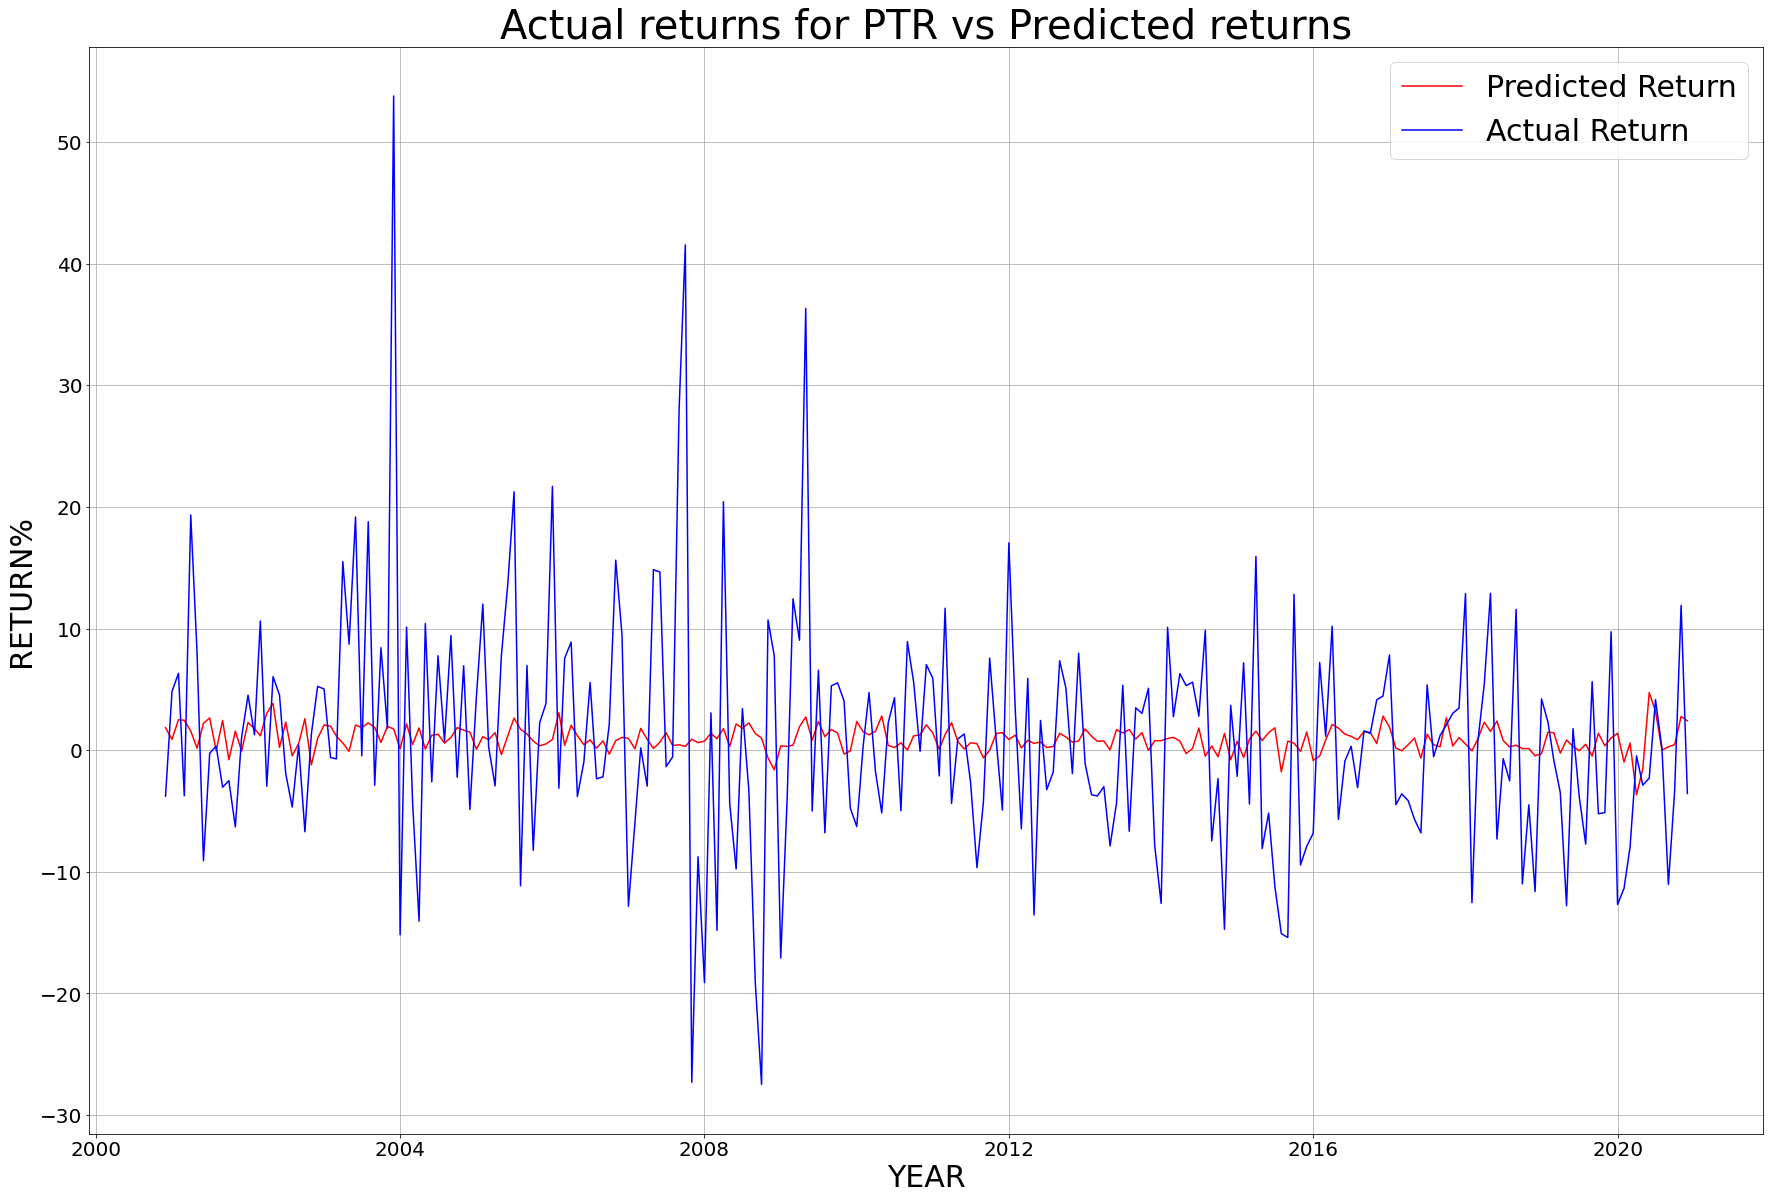

In [84]:
#Plot the actual returns and predicted returns
plt.figure(figsize = (30,20))
plt.grid()
plt.plot(df.loc[1:,'DATE'], pred_r, color = 'r', label='Predicted Return')
plt.plot(df.loc[1:,'DATE'], df.loc[1:,'PTR-Rf'], color = 'b', label='Actual Return')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('YEAR', fontsize = 30)
plt.ylabel('RETURN%', fontsize = 30)
plt.title('Actual returns for PTR vs Predicted returns', fontsize = 40)
plt.legend(fontsize = 30)